In [197]:
# import necessary libraries for data preprocessing -
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold
import shap

# Data Cleaning & Preprocessing

In [63]:
# Reading the csv file -
data = pd.read_csv("Aviation.csv")

In [64]:
# Displaying the shape of the data -
data.shape

(200000, 18)

In [65]:
#Displaying rows
data.head(2)

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.9,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.7,2941.32,2.89,8040.01,398.07,30032.84


In [66]:
#  Checking Data type of columns -
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Flight Number                     200000 non-null  object 
 1   Scheduled Departure Time          200000 non-null  object 
 2   Actual Departure Time             200000 non-null  object 
 3   Delay (Minutes)                   200000 non-null  int64  
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64
 5   Turnaround Time (Minutes)         200000 non-null  int64  
 6   Load Factor (%)                   200000 non-null  float64
 7   Fleet Availability (%)            200000 non-null  float64
 8   Maintenance Downtime (Hours)      200000 non-null  float64
 9   Fuel Efficiency (ASK)             200000 non-null  float64
 10  Revenue (USD)                     200000 non-null  float64
 11  Operating Cost (USD)              200000 non-null  f

In [67]:
# Replacing space with _ in column names and making it to lower case
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [68]:
# changing the data type of (scheduled_departure_time', 'actual_departure_time')
data['scheduled_departure_time'] = pd.to_datetime(data['scheduled_departure_time'])
data['actual_departure_time'] = pd.to_datetime(data['actual_departure_time'])

In [69]:
#Displaying thw null values of each column -
data.isnull().sum().sort_values(ascending=False)

flight_number                       0
scheduled_departure_time            0
cost_per_ask                        0
revenue_per_ask                     0
debt-to-equity_ratio                0
ancillary_revenue_(usd)             0
net_profit_margin_(%)               0
operating_cost_(usd)                0
revenue_(usd)                       0
fuel_efficiency_(ask)               0
maintenance_downtime_(hours)        0
fleet_availability_(%)              0
load_factor_(%)                     0
turnaround_time_(minutes)           0
aircraft_utilization_(hours/day)    0
delay_(minutes)                     0
actual_departure_time               0
profit_(usd)                        0
dtype: int64

In [70]:
# Dropping the null values -
data.dropna(inplace=True)

In [71]:
# Displaying  the duplicate values -
data.duplicated().sum()

0

In [72]:
# Displaying statistical summary of the data -
data.describe().T

,count,mean,min,25%,50%,75%,max,std
scheduled_departure_time,200000,2024-06-29 07:21:27.048759808,2024-01-01 00:01:53,2024-03-30 22:12:47,2024-06-29 10:33:27,2024-09-27 09:33:27.500000,2024-12-27 05:14:39,NaN
actual_departure_time,200000,2024-06-29 08:55:04.200095232,2024-01-01 00:03:34,2024-03-30 15:40:28.249999872,2024-06-28 20:10:25,2024-09-28 03:54:08.500000,2024-12-27 05:07:36,NaN
delay_(minutes),200000.0,59.35885,0.0,29.0,59.0,89.0,119.0,34.67602
aircraft_utilization_(hours/day),200000.0,12.003438,8.0,9.99,12.01,14.01,16.0,2.311966
turnaround_time_(minutes),200000.0,74.45168,30.0,52.0,74.0,97.0,119.0,25.977826
load_factor_(%),200000.0,74.997178,50.0,62.5,74.96,87.53,100.0,14.439393
fleet_availability_(%),200000.0,85.001378,70.0,77.48,85.0,92.53,100.0,8.672413
maintenance_downtime_(hours),200000.0,5.503103,1.0,3.25,5.5,7.76,10.0,2.601257
fuel_efficiency_(ask),200000.0,3.496959,2.0,2.75,3.49,4.25,5.0,0.865309
revenue_(usd),200000.0,25571.448338,1000.06,13297.0425,25566.3,37860.4025,49999.95,14158.512116


In [73]:
# Creating  variables for all numerical columns and categorical columns -
num_col = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:" , num_col)
cat_col= data.select_dtypes(include=['object']).columns
print("Categorical columns:" , cat_col)

Numerical Columns: Index(['delay_(minutes)', 'aircraft_utilization_(hours/day)',
       'turnaround_time_(minutes)', 'load_factor_(%)',
       'fleet_availability_(%)', 'maintenance_downtime_(hours)',
       'fuel_efficiency_(ask)', 'revenue_(usd)', 'operating_cost_(usd)',
       'net_profit_margin_(%)', 'ancillary_revenue_(usd)',
       'debt-to-equity_ratio', 'revenue_per_ask', 'cost_per_ask',
       'profit_(usd)'],
      dtype='object')
Categorical columns: Index(['flight_number'], dtype='object')


# Data Visualization 

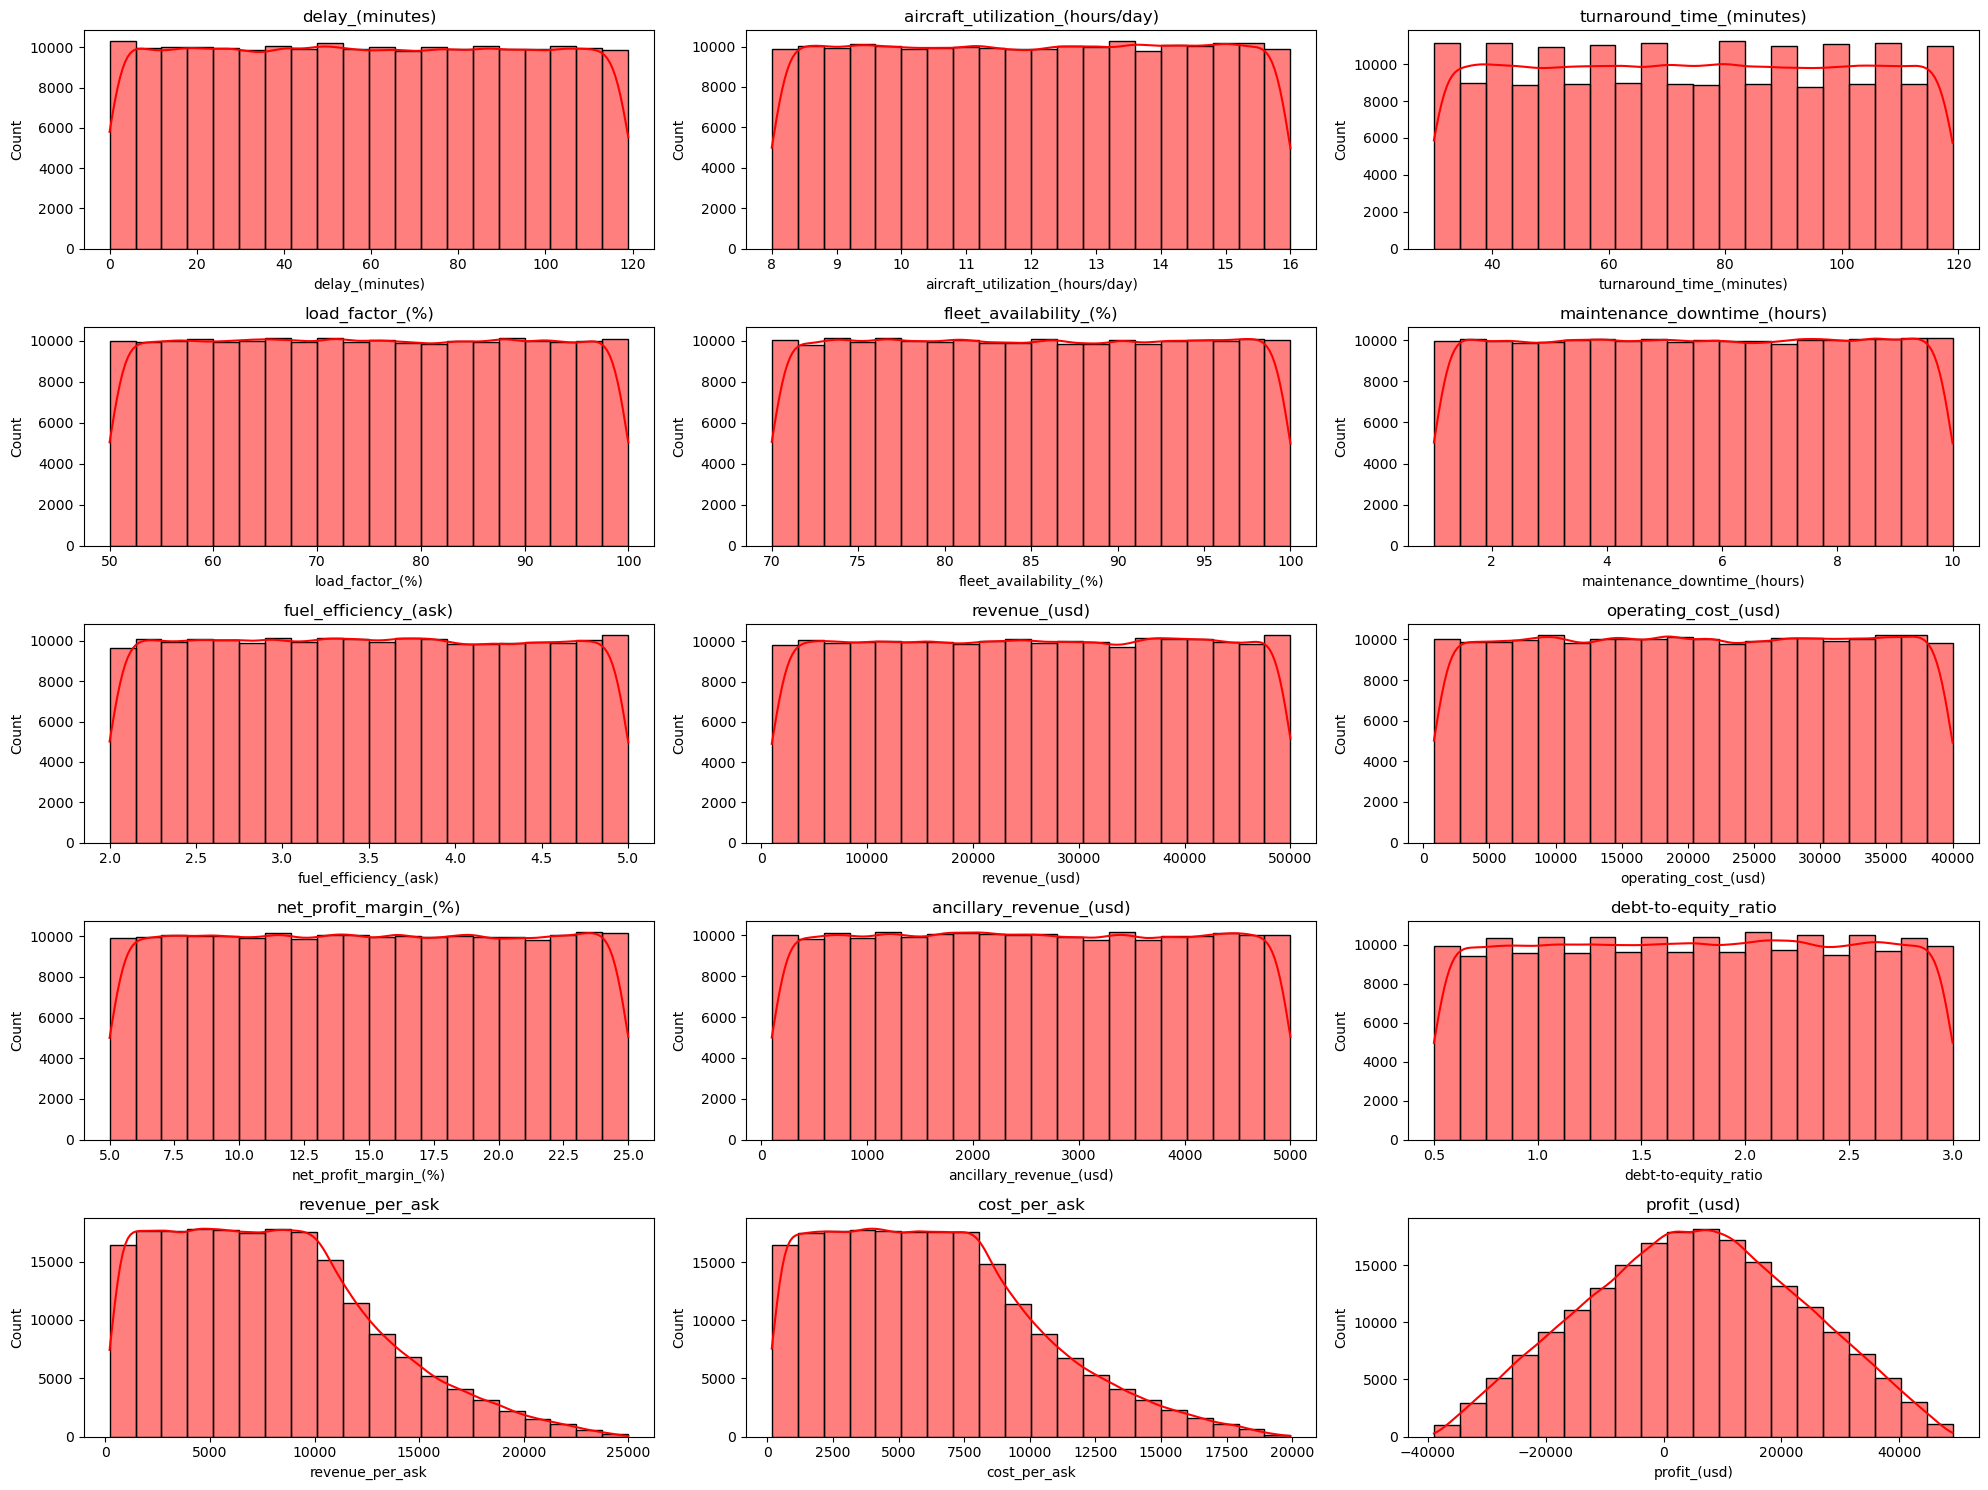

In [75]:
# Displaying Distplot for each numerical column to see the distribution of the data -
plt.figure(figsize=(20, 15))
num_cols = len(num_col)
num_rows = (num_cols + 2) // 3
for i, col in enumerate(num_col):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(data[col], bins=20, kde=True, color='red')
    plt.title(col)
plt.tight_layout()
plt.show()

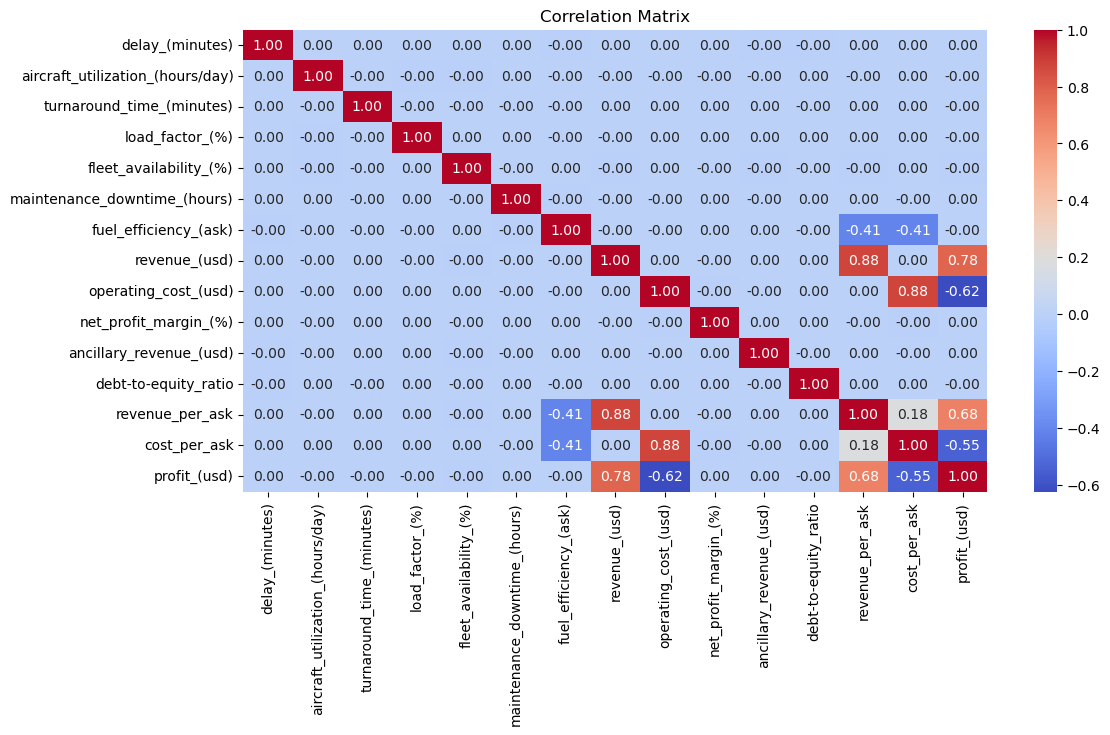

In [76]:
# Creating a correlation heatmap to check the correlation betwwne the multiple numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_columns.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Outliers Handling 

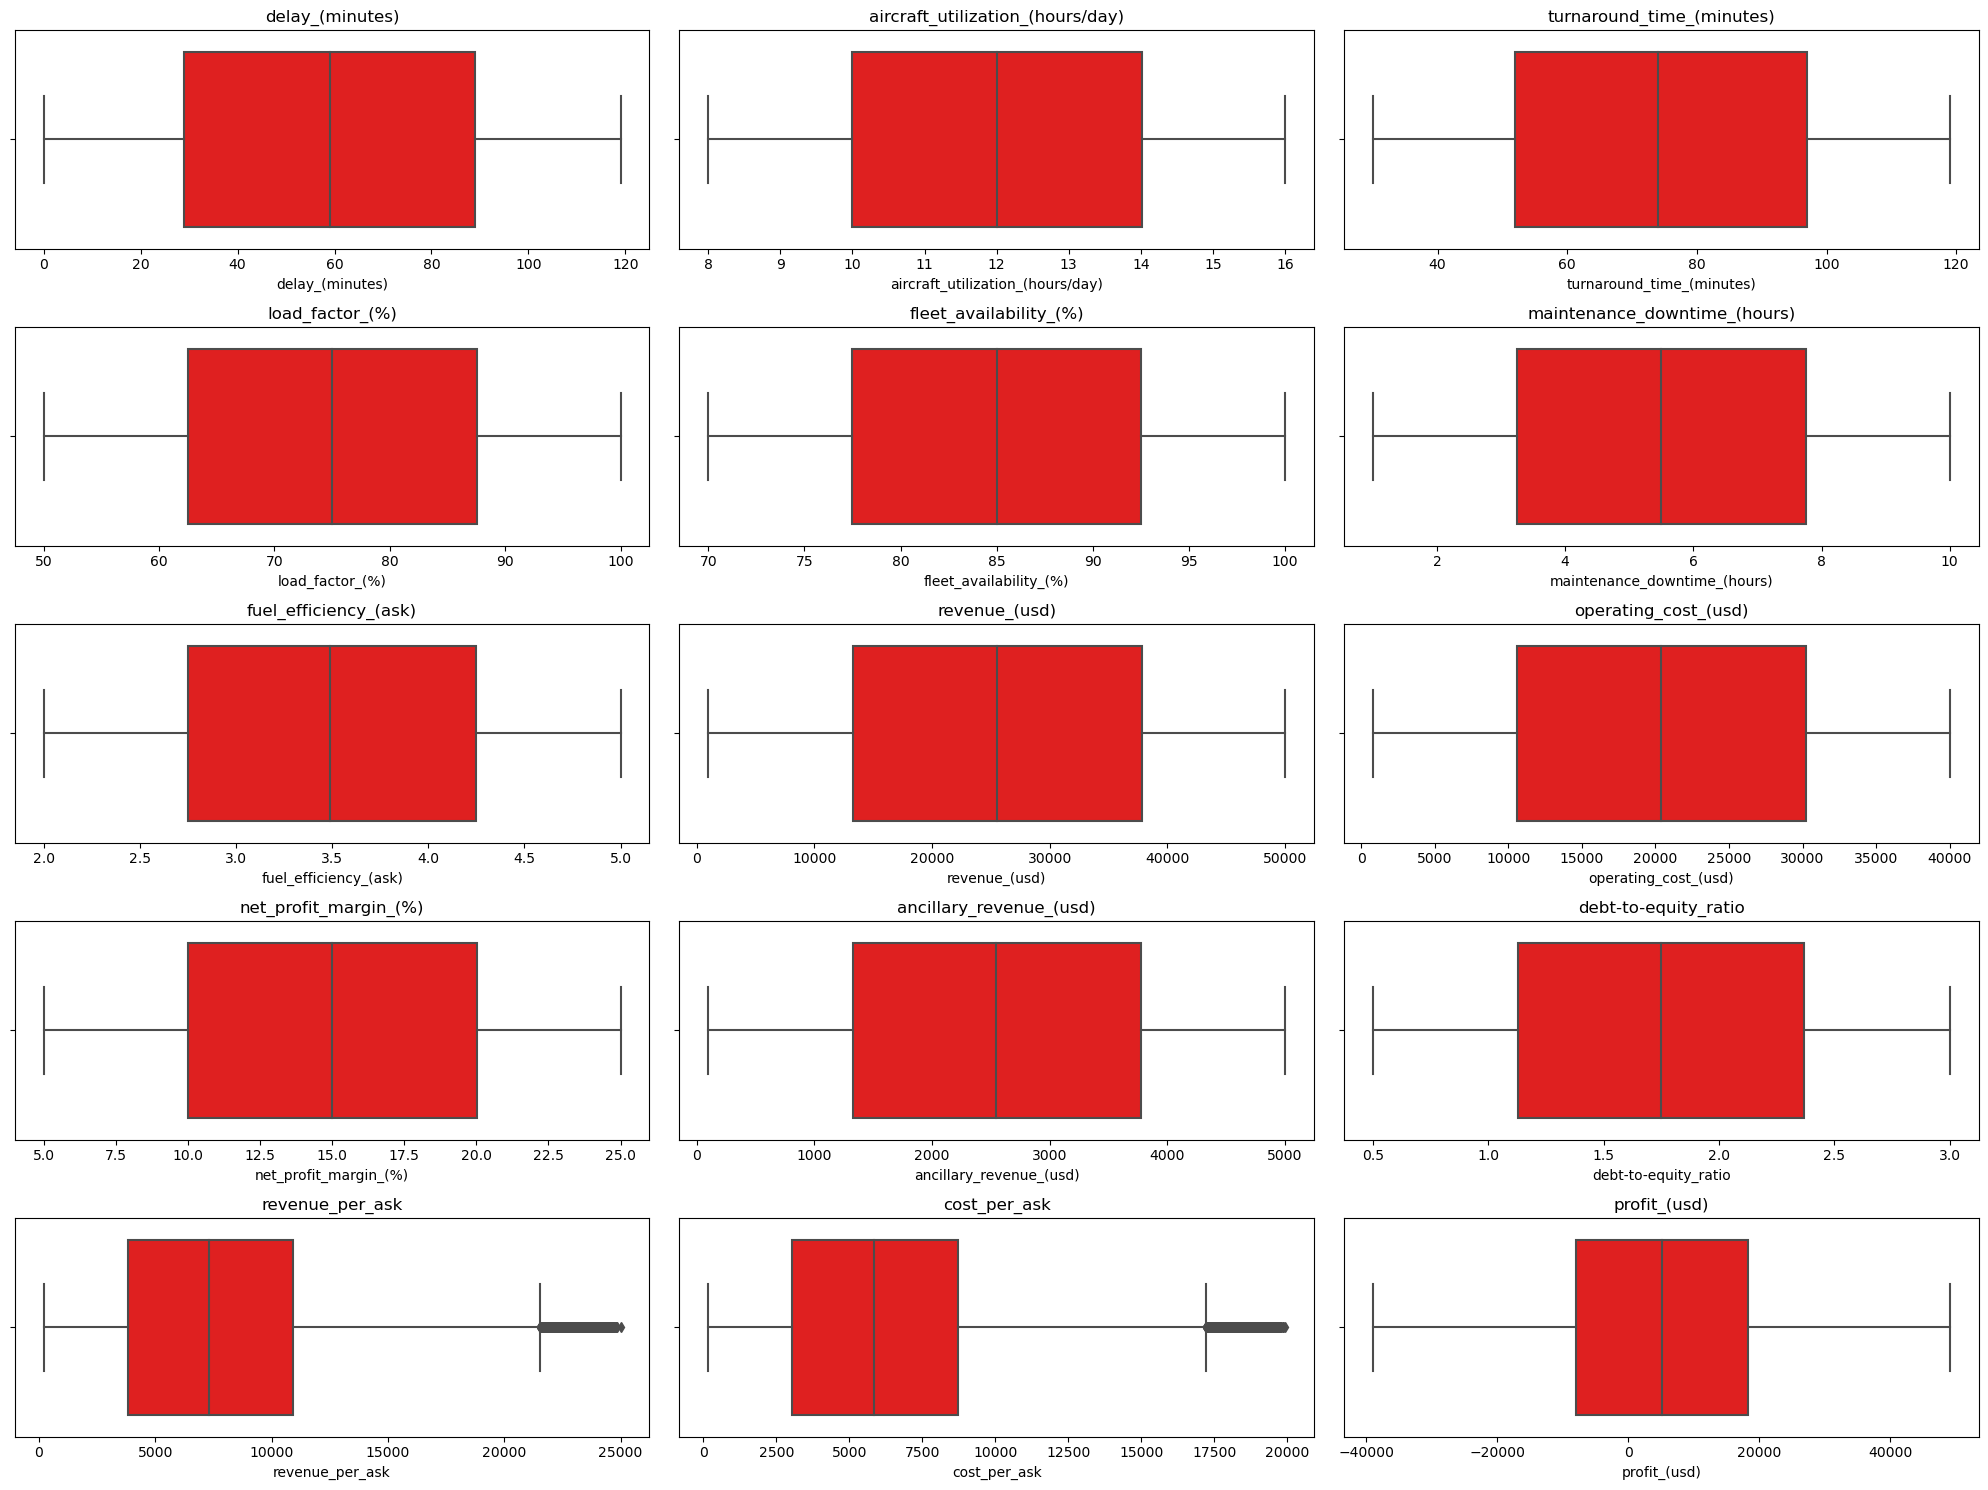

In [78]:
# Displaying Distplot for each numerical column to see the distribution of the data -
plt.figure(figsize=(20, 15))
num_cols = len(num_col)
num_rows = (num_cols + 2) // 3
for i, col in enumerate(num_col):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(x=data[col], color='red')
    plt.title(col)
plt.tight_layout()
plt.show()

In [79]:
# Checking outliers using IQR method:
Q1 = data[numerical_columns.columns].quantile(0.25) # Use columns attribute to get column names
Q3 = data[numerical_columns.columns].quantile(0.75) # Use columns attribute to get column names
IQR = Q3 - Q1

outliers_IQR = ((data[numerical_columns.columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns.columns] > (Q3 + 1.5 * IQR))).sum() # Use columns attribute to get column names

print("Outliers using IQR method:\n", outliers_IQR)

Outliers using IQR method:
 delay_(minutes)                        0
aircraft_utilization_(hours/day)       0
turnaround_time_(minutes)              0
load_factor_(%)                        0
fleet_availability_(%)                 0
maintenance_downtime_(hours)           0
fuel_efficiency_(ask)                  0
revenue_(usd)                          0
operating_cost_(usd)                   0
net_profit_margin_(%)                  0
ancillary_revenue_(usd)                0
debt-to-equity_ratio                   0
revenue_per_ask                     1544
cost_per_ask                        1555
profit_(usd)                           0
dtype: int64


In [80]:
#Performing capping to handle outliers
def cap_outliers(data, columns, lower_percentile=0.05, upper_percentile=0.95):
    for column in columns:
        lower_bound = data[column].quantile(lower_percentile)
        upper_bound = data[column].quantile(upper_percentile)

        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

    return data

# Apply the function to cap outliers
columns = ['revenue_per_ask', 'cost_per_ask']

df = cap_outliers(data, columns)

In [81]:
df.sample(2)

,flight_number,scheduled_departure_time,actual_departure_time,delay_(minutes),aircraft_utilization_(hours/day),turnaround_time_(minutes),load_factor_(%),fleet_availability_(%),maintenance_downtime_(hours),fuel_efficiency_(ask),revenue_(usd),operating_cost_(usd),net_profit_margin_(%),ancillary_revenue_(usd),debt-to-equity_ratio,revenue_per_ask,cost_per_ask,profit_(usd)
27342,FL602,2024-03-26 12:09:34,2024-08-29 00:54:37,85,8.28,93,93.60,90.71,6.20,4.43,11250.73,37480.63,23.94,4736.41,2.86,2539.67,8460.64,-26229.90
79384,FL694,2024-09-14 13:17:15,2024-01-05 16:42:43,71,14.80,60,63.62,75.82,8.15,3.45,29509.59,10715.04,13.40,3069.57,2.41,8553.50,3105.81,18794.55


In [82]:
# Checking outliers using IQR method:
Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3 - Q1

outliers_IQR = ((df[num_col] < (Q1 - 1.5 * IQR)) | (df[num_col] > (Q3 + 1.5 * IQR))).sum()

print("Outliers using IQR method:\n", outliers_IQR)

Outliers using IQR method:
 delay_(minutes)                     0
aircraft_utilization_(hours/day)    0
turnaround_time_(minutes)           0
load_factor_(%)                     0
fleet_availability_(%)              0
maintenance_downtime_(hours)        0
fuel_efficiency_(ask)               0
revenue_(usd)                       0
operating_cost_(usd)                0
net_profit_margin_(%)               0
ancillary_revenue_(usd)             0
debt-to-equity_ratio                0
revenue_per_ask                     0
cost_per_ask                        0
profit_(usd)                        0
dtype: int64


# Feature Creation

In [84]:
# Extract various datetime components for 'scheduled_departure_time'
df['sd_year'] = df['scheduled_departure_time'].dt.year
df['sd_month'] = df['scheduled_departure_time'].dt.month
df['sd_day_of_week'] = df['scheduled_departure_time'].dt.dayofweek

In [85]:
# Extract various datetime components for 'actual_departure_time'
df['ad_year'] = df['actual_departure_time'].dt.year
df['ad_month'] = df['actual_departure_time'].dt.month
df['ad_day_of_week'] = df['actual_departure_time'].dt.dayofweek

In [86]:
# Creating a feature that quantifies the cost impact of delays
df['delay_cost_impact'] = df['delay_(minutes)'] * df['cost_per_ask']

In [87]:
# Example: Peak season (June-August and December)
df['peak_season'] = df['sd_month'].apply(lambda x: 1 if x in [6, 12, 10, 2] else 0)

In [88]:
# Create a feature that captures the impact of maintenance downtime on profitability:
df['maintenance_impact'] = df['maintenance_downtime_(hours)'] * df['cost_per_ask']

In [89]:
# Create a feature that measures how efficiently the aircraft is being utilized:
df['turnaround_efficiency'] = df['turnaround_time_(minutes)'] / df['aircraft_utilization_(hours/day)']

In [90]:
df.columns

Index(['flight_number', 'scheduled_departure_time', 'actual_departure_time',
       'delay_(minutes)', 'aircraft_utilization_(hours/day)',
       'turnaround_time_(minutes)', 'load_factor_(%)',
       'fleet_availability_(%)', 'maintenance_downtime_(hours)',
       'fuel_efficiency_(ask)', 'revenue_(usd)', 'operating_cost_(usd)',
       'net_profit_margin_(%)', 'ancillary_revenue_(usd)',
       'debt-to-equity_ratio', 'revenue_per_ask', 'cost_per_ask',
       'profit_(usd)', 'sd_year', 'sd_month', 'sd_day_of_week', 'ad_year',
       'ad_month', 'ad_day_of_week', 'delay_cost_impact', 'peak_season',
       'maintenance_impact', 'turnaround_efficiency'],
      dtype='object')

In [91]:
# Feature Selection
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
corr_matrix = numeric_df.corr()
high_corr = corr_matrix[abs(corr_matrix) > 0.8].stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]

print(high_corr)

                      level_0                    level_1         0
3   turnaround_time_(minutes)      turnaround_efficiency  0.852677
9               revenue_(usd)            revenue_per_ask  0.888971
11       operating_cost_(usd)               cost_per_ask  0.888873
15            revenue_per_ask              revenue_(usd)  0.888971
17               cost_per_ask       operating_cost_(usd)  0.888873
27      turnaround_efficiency  turnaround_time_(minutes)  0.852677


In [92]:
#Dropping unnecessary column -
df.drop(['flight_number', 'scheduled_departure_time', 'actual_departure_time' ,'revenue_(usd)', 'operating_cost_(usd)','turnaround_time_(minutes)'] , inplace=True, axis=1)

In [93]:
df.columns

Index(['delay_(minutes)', 'aircraft_utilization_(hours/day)',
       'load_factor_(%)', 'fleet_availability_(%)',
       'maintenance_downtime_(hours)', 'fuel_efficiency_(ask)',
       'net_profit_margin_(%)', 'ancillary_revenue_(usd)',
       'debt-to-equity_ratio', 'revenue_per_ask', 'cost_per_ask',
       'profit_(usd)', 'sd_year', 'sd_month', 'sd_day_of_week', 'ad_year',
       'ad_month', 'ad_day_of_week', 'delay_cost_impact', 'peak_season',
       'maintenance_impact', 'turnaround_efficiency'],
      dtype='object')

In [94]:
# Displaying the top 3 rows of the data
df.head(3)

,delay_(minutes),aircraft_utilization_(hours/day),load_factor_(%),fleet_availability_(%),maintenance_downtime_(hours),fuel_efficiency_(ask),net_profit_margin_(%),ancillary_revenue_(usd),debt-to-equity_ratio,revenue_per_ask,...,sd_year,sd_month,sd_day_of_week,ad_year,ad_month,ad_day_of_week,delay_cost_impact,peak_season,maintenance_impact,turnaround_efficiency
0,50,12.36,79.18,96.24,9.21,4.15,17.90,1058.68,2.46,2639.46,...,2024,5,0,2024,7,2,335513.0000,0,61801.494600,9.304207
1,27,14.53,98.59,80.49,1.55,3.93,7.70,2941.32,2.89,8040.01,...,2024,1,1,2024,7,6,21380.9895,0,1227.427175,5.712319
2,108,10.73,67.44,97.90,2.06,4.26,5.84,1920.45,1.34,3216.03,...,2024,5,3,2024,12,3,773109.3600,0,14746.345200,8.108108


In [95]:
df.columns # Displaying column names 

Index(['delay_(minutes)', 'aircraft_utilization_(hours/day)',
       'load_factor_(%)', 'fleet_availability_(%)',
       'maintenance_downtime_(hours)', 'fuel_efficiency_(ask)',
       'net_profit_margin_(%)', 'ancillary_revenue_(usd)',
       'debt-to-equity_ratio', 'revenue_per_ask', 'cost_per_ask',
       'profit_(usd)', 'sd_year', 'sd_month', 'sd_day_of_week', 'ad_year',
       'ad_month', 'ad_day_of_week', 'delay_cost_impact', 'peak_season',
       'maintenance_impact', 'turnaround_efficiency'],
      dtype='object')

In [96]:
# Displaying the unique value present in year column - 
col = ['sd_year', 'ad_year']
for i in col:
    print(i , df[i].unique()) #only one year of data we have 

sd_year [2024]
ad_year [2024]


# Data Visualization 2.o

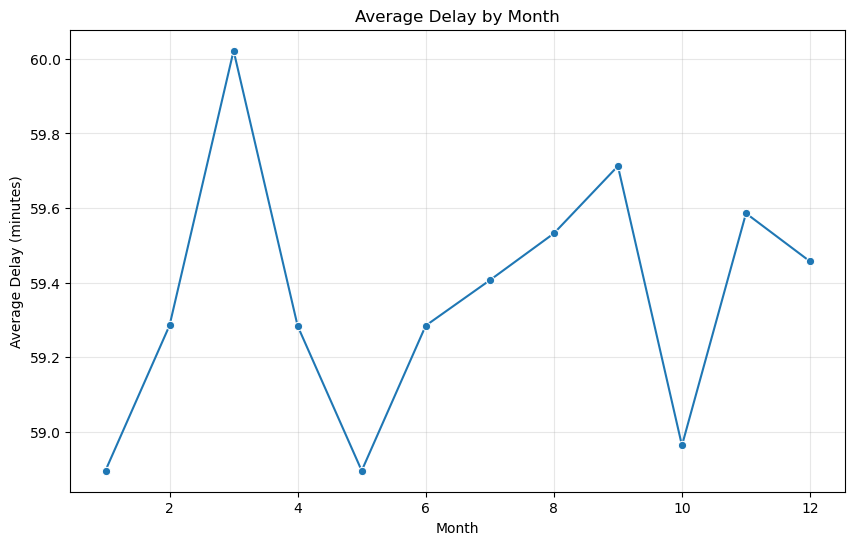

In [97]:
# Time series of delays by month
monthly_delays = data.groupby('sd_month')['delay_(minutes)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='sd_month', y='delay_(minutes)', data=monthly_delays, marker='o')
plt.title('Average Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.grid(True, alpha=0.3)

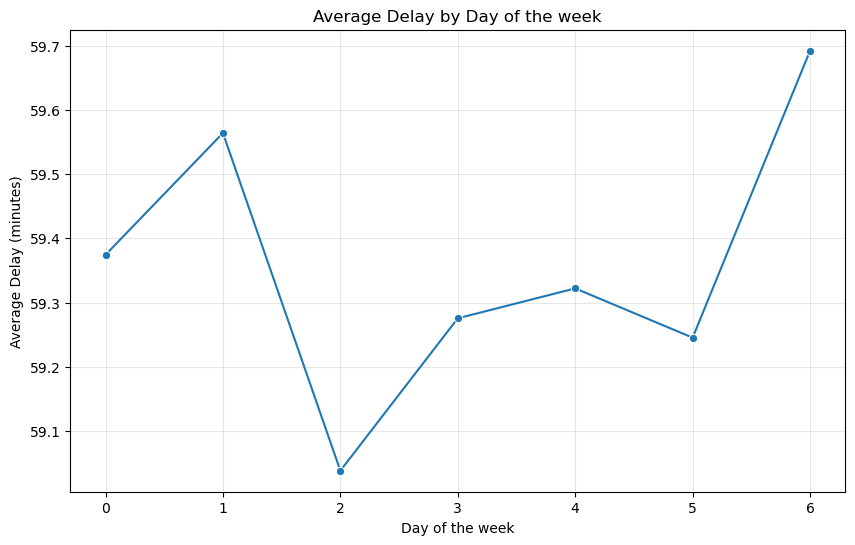

In [98]:
# Time series of delays by month
monthly_delays = data.groupby('sd_day_of_week')['delay_(minutes)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='sd_day_of_week', y='delay_(minutes)', data=monthly_delays, marker='o')
plt.title('Average Delay by Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Average Delay (minutes)')
plt.grid(True, alpha=0.3)

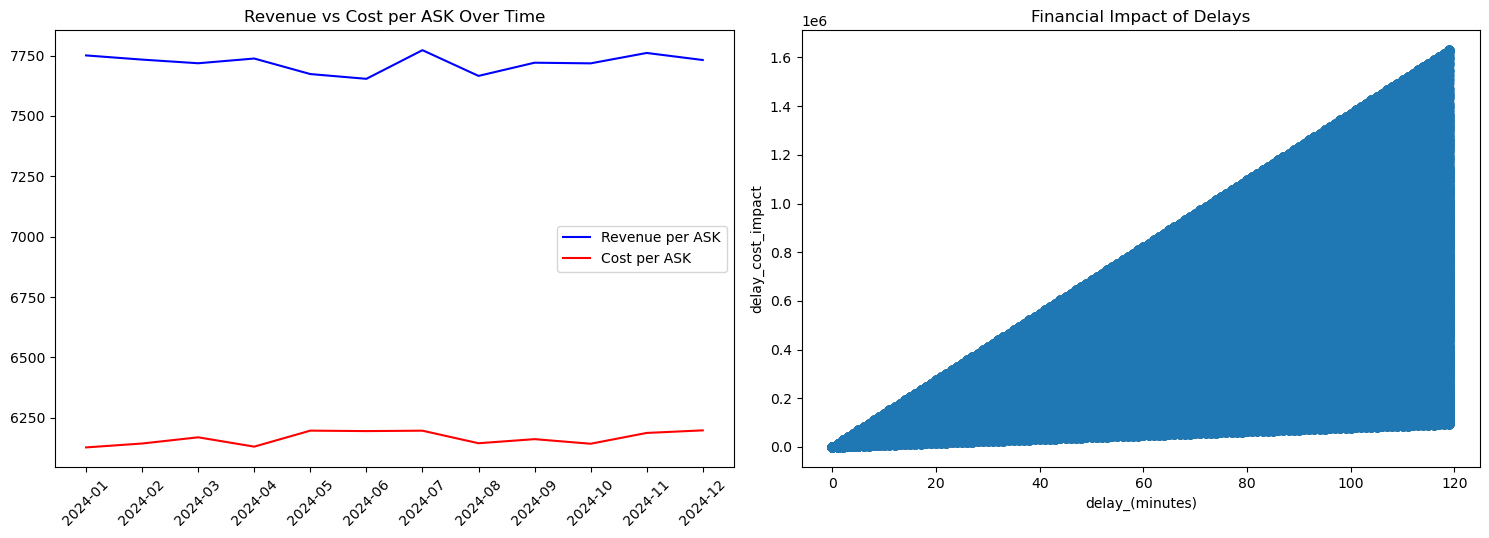

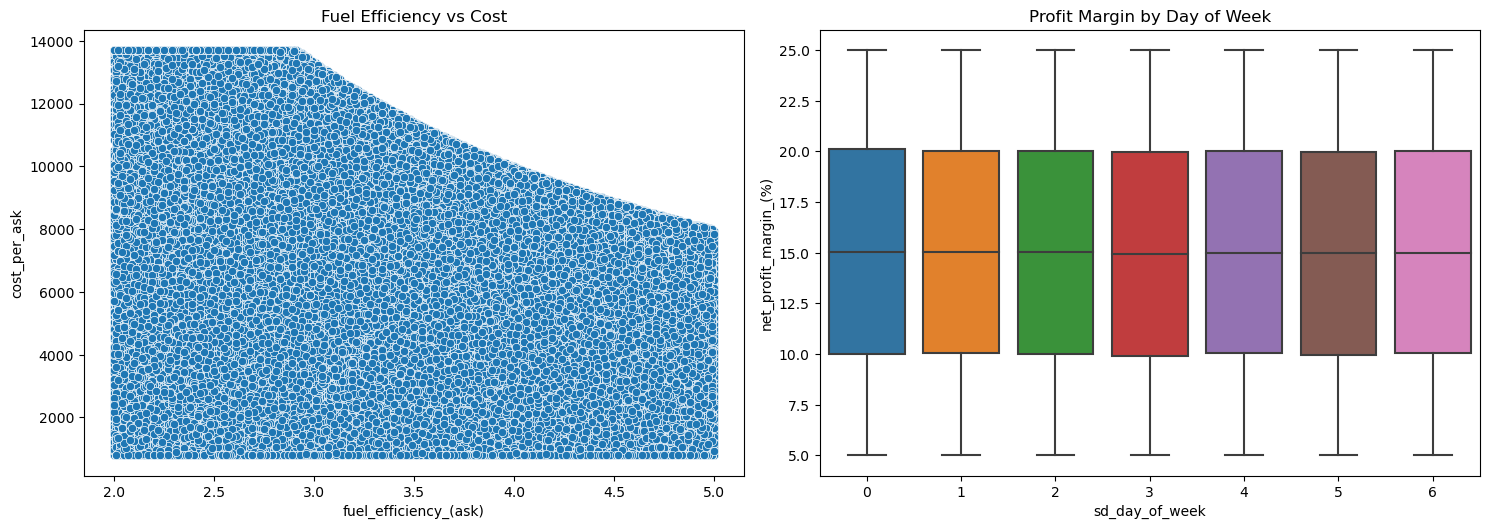

In [99]:
# Create a revenue vs. cost dashboard
plt.figure(figsize=(15, 10))

# Plot 1: Revenue vs Cost per ASK over time
plt.subplot(2, 2, 1)
if 'date' in data.columns:
    data['ym'] = pd.to_datetime(data['date']).dt.to_period('M')
else:
    # Create date from year and month
    data['ym'] = pd.PeriodIndex(year=data['sd_year'], month=data['sd_month'], freq='M')
    
monthly_metrics = data.groupby('ym').agg({
    'revenue_per_ask': 'mean',
    'cost_per_ask': 'mean'
}).reset_index()

plt.plot(monthly_metrics['ym'].astype(str), monthly_metrics['revenue_per_ask'], 'b-', label='Revenue per ASK')
plt.plot(monthly_metrics['ym'].astype(str), monthly_metrics['cost_per_ask'], 'r-', label='Cost per ASK')
plt.xticks(rotation=45)
plt.legend()
plt.title('Revenue vs Cost per ASK Over Time')


# Plot 4: Delay cost impact analysis
plt.subplot(2, 2, 2)
sns.regplot(x='delay_(minutes)', y='delay_cost_impact', data=data)
plt.title('Financial Impact of Delays')
plt.tight_layout()

# Operational efficiency dashboard
plt.figure(figsize=(15, 10))


# Plot 3: Fuel efficiency impact on costs
plt.subplot(2, 2, 1)
sns.scatterplot(x='fuel_efficiency_(ask)', y='cost_per_ask', data=data)
plt.title('Fuel Efficiency vs Cost')

# Plot 4: Day of week profitability
plt.subplot(2, 2, 2)
sns.boxplot(x='sd_day_of_week', y='net_profit_margin_(%)', data=data)
plt.title('Profit Margin by Day of Week')
plt.tight_layout()

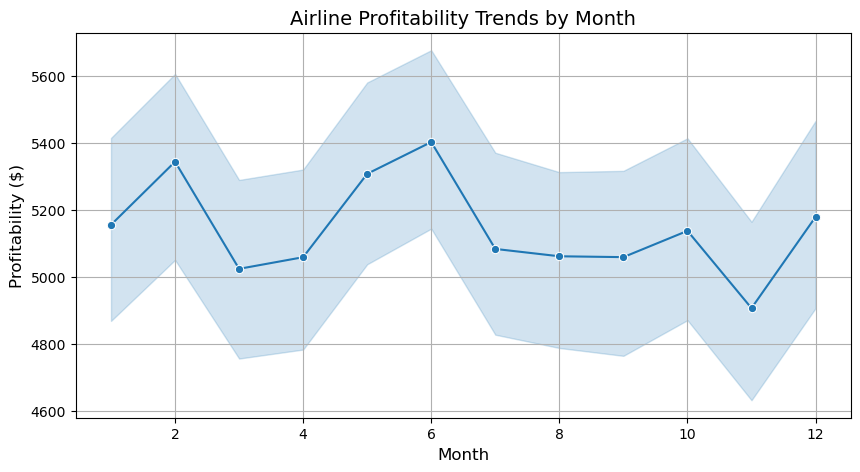

In [100]:
# Dsiplaying a graph for "Airline Profitability Trends by Month"
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['ad_month'], y=df['profit_(usd)'], marker='o')

# Customize the plot
plt.title("Airline Profitability Trends by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Profitability ($)", fontsize=12)
plt.grid(True)
plt.show()

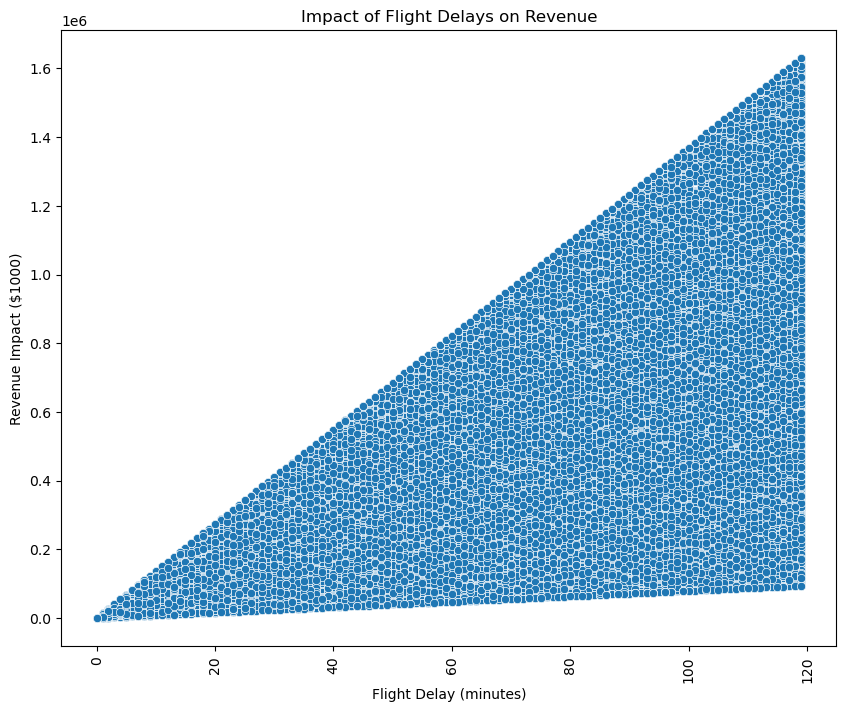

In [169]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['delay_(minutes)'], y=df['delay_cost_impact'])

plt.title("Impact of Flight Delays on Revenue")
plt.xlabel("Flight Delay (minutes)")
plt.ylabel("Revenue Impact ($1000)")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Plot the line chart
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['sd_month'], y=df['profit_(usd)'], marker='o')

# Customize the plot
plt.title("Airline Profitability Trends by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Profitability ($)", fontsize=12)
plt.grid(True)
plt.show()

In [102]:
df.columns

Index(['delay_(minutes)', 'aircraft_utilization_(hours/day)',
       'load_factor_(%)', 'fleet_availability_(%)',
       'maintenance_downtime_(hours)', 'fuel_efficiency_(ask)',
       'net_profit_margin_(%)', 'ancillary_revenue_(usd)',
       'debt-to-equity_ratio', 'revenue_per_ask', 'cost_per_ask',
       'profit_(usd)', 'sd_year', 'sd_month', 'sd_day_of_week', 'ad_year',
       'ad_month', 'ad_day_of_week', 'delay_cost_impact', 'peak_season',
       'maintenance_impact', 'turnaround_efficiency', 'ym'],
      dtype='object')

In [103]:
df.drop(['ym'] , inplace=True , axis=1)

In [104]:
df.columns

Index(['delay_(minutes)', 'aircraft_utilization_(hours/day)',
       'load_factor_(%)', 'fleet_availability_(%)',
       'maintenance_downtime_(hours)', 'fuel_efficiency_(ask)',
       'net_profit_margin_(%)', 'ancillary_revenue_(usd)',
       'debt-to-equity_ratio', 'revenue_per_ask', 'cost_per_ask',
       'profit_(usd)', 'sd_year', 'sd_month', 'sd_day_of_week', 'ad_year',
       'ad_month', 'ad_day_of_week', 'delay_cost_impact', 'peak_season',
       'maintenance_impact', 'turnaround_efficiency'],
      dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   delay_(minutes)                   200000 non-null  int64  
 1   aircraft_utilization_(hours/day)  200000 non-null  float64
 2   load_factor_(%)                   200000 non-null  float64
 3   fleet_availability_(%)            200000 non-null  float64
 4   maintenance_downtime_(hours)      200000 non-null  float64
 5   fuel_efficiency_(ask)             200000 non-null  float64
 6   net_profit_margin_(%)             200000 non-null  float64
 7   ancillary_revenue_(usd)           200000 non-null  float64
 8   debt-to-equity_ratio              200000 non-null  float64
 9   revenue_per_ask                   200000 non-null  float64
 10  cost_per_ask                      200000 non-null  float64
 11  profit_(usd)                      200000 non-null  f

# Model Selection & Training

In [107]:
df.columns

Index(['delay_(minutes)', 'aircraft_utilization_(hours/day)',
       'load_factor_(%)', 'fleet_availability_(%)',
       'maintenance_downtime_(hours)', 'fuel_efficiency_(ask)',
       'net_profit_margin_(%)', 'ancillary_revenue_(usd)',
       'debt-to-equity_ratio', 'revenue_per_ask', 'cost_per_ask',
       'profit_(usd)', 'sd_year', 'sd_month', 'sd_day_of_week', 'ad_year',
       'ad_month', 'ad_day_of_week', 'delay_cost_impact', 'peak_season',
       'maintenance_impact', 'turnaround_efficiency'],
      dtype='object')

In [108]:
numerical_features = ['delay_(minutes)', 'aircraft_utilization_(hours/day)',
       'load_factor_(%)', 'fleet_availability_(%)',
       'maintenance_downtime_(hours)', 'fuel_efficiency_(ask)',
       'net_profit_margin_(%)', 'ancillary_revenue_(usd)',
       'debt-to-equity_ratio', 'revenue_per_ask', 'cost_per_ask',
       'profit_(usd)', 'sd_year', 'sd_month', 'sd_day_of_week', 'ad_year',
       'ad_month', 'ad_day_of_week', 'delay_cost_impact', 'peak_season',
       'maintenance_impact', 'turnaround_efficiency' ]

In [109]:
# Define input variable and target variable
x = df.drop('profit_(usd)', axis=1)
y = df['profit_(usd)']

In [110]:
x.columns

Index(['delay_(minutes)', 'aircraft_utilization_(hours/day)',
       'load_factor_(%)', 'fleet_availability_(%)',
       'maintenance_downtime_(hours)', 'fuel_efficiency_(ask)',
       'net_profit_margin_(%)', 'ancillary_revenue_(usd)',
       'debt-to-equity_ratio', 'revenue_per_ask', 'cost_per_ask', 'sd_year',
       'sd_month', 'sd_day_of_week', 'ad_year', 'ad_month', 'ad_day_of_week',
       'delay_cost_impact', 'peak_season', 'maintenance_impact',
       'turnaround_efficiency'],
      dtype='object')

In [111]:
# Train - test split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [112]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
    ])

In [113]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100,random_state=42 , max_depth = 5, min_samples_split = 5, 
                                                     min_samples_leaf = 5, max_features ='sqrt', n_jobs = 1),
    'XGB Regressor': xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                                      max_depth=5, alpha=10, n_estimators=100)
}

# Evaluate models
best_model = None
best_score = float('inf')
model_results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Store results for later comparison
    model_results[model_name] = {
        'model': model,
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }
    
    print(f"Evaluation metrics for {model_name}")
    print(f"{model_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}, MSE: {mse:.4f}")
    print(" ")
    
    # Select best model based on RMSE
    if rmse < best_score:
        best_score = rmse
        best_model = model
        best_model_name = model_name

print(f"Selected Model: {best_model_name} with RMSE: {best_score:.4f}")



Evaluation metrics for Linear Regression
Linear Regression - MAE: 3087.2360, RMSE: 4258.8085, R²: 0.9444, MSE: 18137449.7855
 
Evaluation metrics for Ridge Regression
Ridge Regression - MAE: 3087.2359, RMSE: 4258.8085, R²: 0.9444, MSE: 18137450.1613
 
Evaluation metrics for Lasso Regression
Lasso Regression - MAE: 3087.2304, RMSE: 4258.8062, R²: 0.9444, MSE: 18137430.6379
 
Evaluation metrics for Gradient Boosting
Gradient Boosting - MAE: 1283.7799, RMSE: 1742.6128, R²: 0.9907, MSE: 3036699.4714
 
Evaluation metrics for Decision Tree Regressor
Decision Tree Regressor - MAE: 852.3954, RMSE: 1544.7264, R²: 0.9927, MSE: 2386179.8001
 
Evaluation metrics for Random Forest Regressor
Random Forest Regressor - MAE: 7378.9686, RMSE: 9267.5648, R²: 0.7366, MSE: 85887756.4216
 
Evaluation metrics for XGB Regressor
XGB Regressor - MAE: 1797.2886, RMSE: 2416.2944, R²: 0.9821, MSE: 5838478.8055
 
Selected Model: Decision Tree Regressor with RMSE: 1544.7264


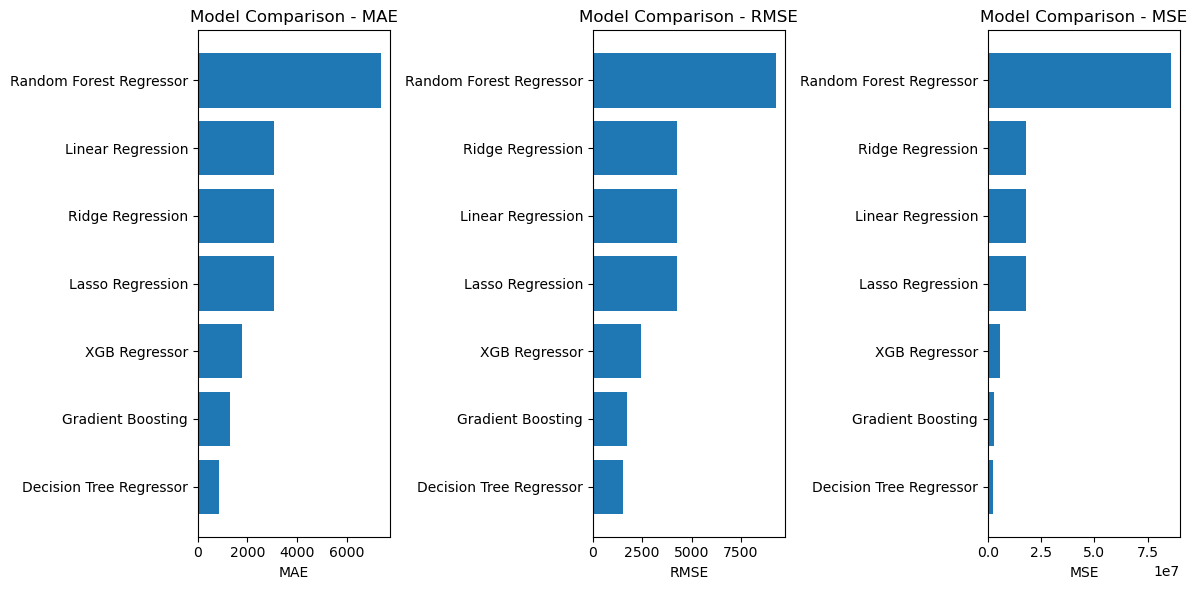

In [114]:
# Create comparison bar charts
metrics = ['mae', 'rmse', 'mse']
plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    model_names = list(model_results.keys())
    values = [model_results[model][metric] for model in model_names]
    
    # Sort by metric value
    sorted_indices = np.argsort(values)
    sorted_models = [model_names[i] for i in sorted_indices]
    sorted_values = [values[i] for i in sorted_indices]
    
    plt.barh(sorted_models, sorted_values )
    plt.title(f'Model Comparison - {metric.upper()}')
    plt.xlabel(metric.upper())
    
plt.tight_layout()
plt.show()

# Model Selection & Training with PCA (Using pipeline)

In [115]:
# Update models dictionary with PCA pipelines
models = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('model', LinearRegression())
    ]),
    'Ridge Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('model', Ridge(alpha=1.0))
    ]),
    'Lasso Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('model', Lasso(alpha=0.1))
    ]),
    'Gradient Boosting': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('model', GradientBoostingRegressor())
    ]),
    'Decision Tree Regressor': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('model', DecisionTreeRegressor(random_state=42))
    ]),
    'Random Forest Regressor': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('model', RandomForestRegressor(n_estimators=100, random_state=42, 
                                      max_depth=5, min_samples_split=5, 
                                      min_samples_leaf=5, max_features='sqrt', 
                                      n_jobs=1))
    ]),
    'XGB Regressor': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('model', xgb.XGBRegressor(objective='reg:squarederror', 
                                  colsample_bytree=0.3, learning_rate=0.1,
                                  max_depth=5, alpha=10, n_estimators=100))
    ])
}

# Evaluate models with PCA
best_model = None
best_score = float('inf')
model_results = {}

for model_name, pipeline in models.items():
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    model_results[model_name] = {
        'pipeline': pipeline,
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }
    
    print(f"Evaluation metrics for {model_name} with PCA")
    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}, MSE: {mse:.4f}")
    print("="*60)
    
    # Update best model
    if rmse < best_score:
        best_score = rmse
        best_model = pipeline
        best_model_name = model_name

print(f"\nBest Model: {best_model_name} with RMSE: {best_score:.4f}")

Evaluation metrics for Linear Regression with PCA
MAE: 3487.7699, RMSE: 4669.2399, R²: 0.9331, MSE: 21801800.7774
Evaluation metrics for Ridge Regression with PCA
MAE: 3487.7718, RMSE: 4669.2403, R²: 0.9331, MSE: 21801804.5189
Evaluation metrics for Lasso Regression with PCA
MAE: 3487.7721, RMSE: 4669.2400, R²: 0.9331, MSE: 21801802.3123
Evaluation metrics for Gradient Boosting with PCA
MAE: 2094.8667, RMSE: 2757.1880, R²: 0.9767, MSE: 7602085.5418
Evaluation metrics for Decision Tree Regressor with PCA
MAE: 2595.6689, RMSE: 3392.1956, R²: 0.9647, MSE: 11506991.0011
Evaluation metrics for Random Forest Regressor with PCA
MAE: 7297.5276, RMSE: 9219.9060, R²: 0.7393, MSE: 85006666.3163
Evaluation metrics for XGB Regressor with PCA
MAE: 2634.9873, RMSE: 3448.0573, R²: 0.9635, MSE: 11889099.0176

Best Model: Gradient Boosting with RMSE: 2757.1880



Number of components retained by PCA in best model (Gradient Boosting): 16


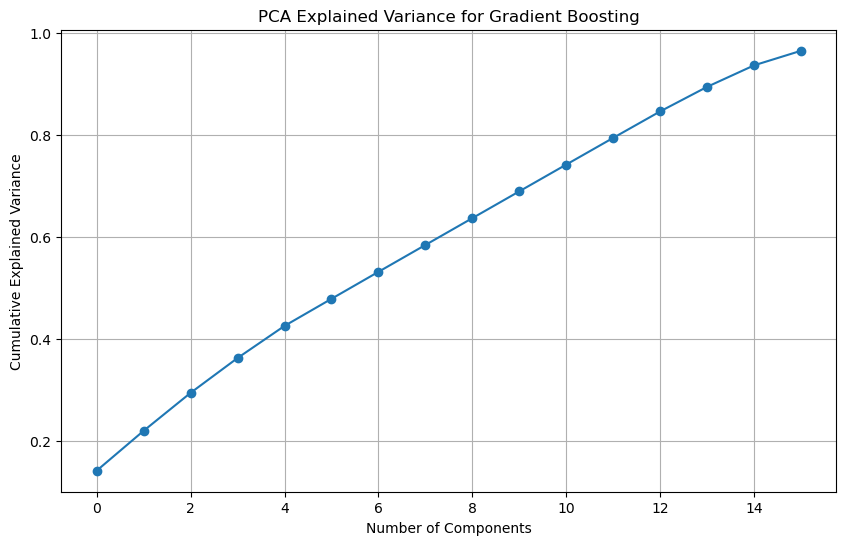

In [116]:
# Optional: Visualize PCA components for the best model
best_pca = best_model.named_steps['pca']
print(f"\nNumber of components retained by PCA in best model ({best_model_name}): {best_pca.n_components_}")

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(best_pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title(f'PCA Explained Variance for {best_model_name}')
plt.grid(True)

# Cross - validation & SHAP 

In [213]:
# Evaluate models with cross-validation
best_model = None
best_score = float('inf')
model_results = {}

for model_name, pipeline in models.items():
    # Cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X_train, y_train, 
                               cv=cv, scoring='neg_root_mean_squared_error',
                               n_jobs=-1)
    cv_rmse = (-cv_scores).mean()
    cv_std = cv_scores.std()
    
    # Full training and testing
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    model_results[model_name] = {
        'pipeline': pipeline,
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'cv_rmse': cv_rmse,
        'cv_std': cv_std
    }
    
    print(f"Evaluation for {model_name}")
    print(f"Test RMSE: {rmse:.2f} | CV RMSE: {cv_rmse:.2f} (±{cv_std:.2f})")
    print("="*60)
    
    if rmse < best_score:
        best_score = rmse
        best_model = pipeline
        best_model_name = model_name

# SHAP Explanation for Best Model
def explain_model(pipeline, X_sample, feature_names):
    """
    Explain the model using SHAP values.
    
    Parameters:
        pipeline: The trained pipeline (includes preprocessing and model).
        X_sample: A sample of the training data for SHAP explanation.
        feature_names: List of feature names for interpretability.
    """
    # Extract the model from the pipeline
    model = pipeline.named_steps['model']
    
    # Transform the data using the pipeline steps before the model
    preprocessor = Pipeline(pipeline.steps[:-1])  # Exclude the model step
    X_transformed = preprocessor.transform(X_sample)
    
    # Create SHAP explainer for the model using transformed data
    explainer = shap.KernelExplainer(
        model=model.predict,
        data=shap.sample(X_transformed, 100)  # Use background sample
    )
    
    # Calculate SHAP values for the transformed data
    shap_values = explainer.shap_values(X_transformed)
    
    # Map SHAP values back to original feature names
    if hasattr(preprocessor, 'named_steps') and 'pca' in preprocessor.named_steps:
        pca = preprocessor.named_steps['pca']
        shap_values_original = np.dot(shap_values, pca.components_)
    else:
        shap_values_original = shap_values
    
    # Global feature importance
    print("\nGlobal Feature Importance:")
    shap.summary_plot(shap_values_original, X_sample, feature_names=feature_names)
    
    # Local explanation for first prediction
    print("\nLocal Explanation for First Prediction:")
    shap.force_plot(explainer.expected_value, shap_values_original[0,:], 
                    X_sample.iloc[0,:], feature_names=feature_names, matplotlib=True)
    
    return explainer, shap_values_original



Evaluation for Linear Regression
Test RMSE: 4669.24 | CV RMSE: 4664.20 (±22.67)
Evaluation for Ridge Regression
Test RMSE: 4669.24 | CV RMSE: 4664.20 (±22.67)
Evaluation for Lasso Regression
Test RMSE: 4669.24 | CV RMSE: 4664.20 (±22.67)
Evaluation for Gradient Boosting
Test RMSE: 2757.19 | CV RMSE: 2834.00 (±107.20)
Evaluation for Decision Tree Regressor
Test RMSE: 3392.20 | CV RMSE: 3606.78 (±196.70)
Evaluation for Random Forest Regressor
Test RMSE: 9219.91 | CV RMSE: 9273.00 (±53.06)
Evaluation for XGB Regressor
Test RMSE: 3448.06 | CV RMSE: 3504.05 (±16.29)


  0%|          | 0/100 [00:00<?, ?it/s]


Global Feature Importance:


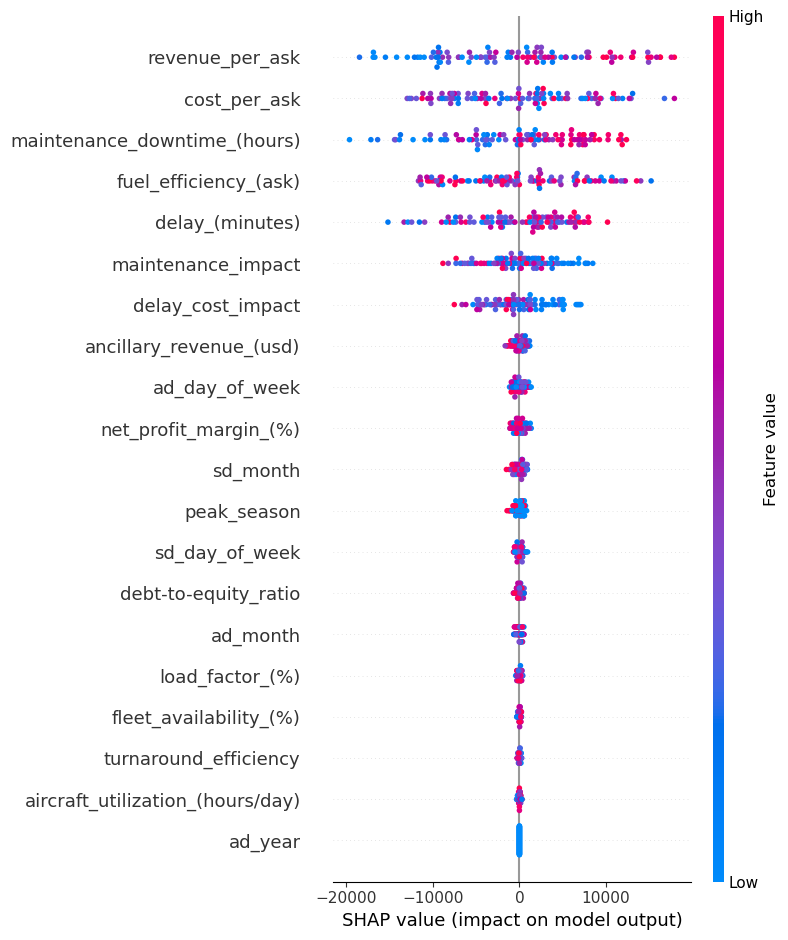


Local Explanation for First Prediction:


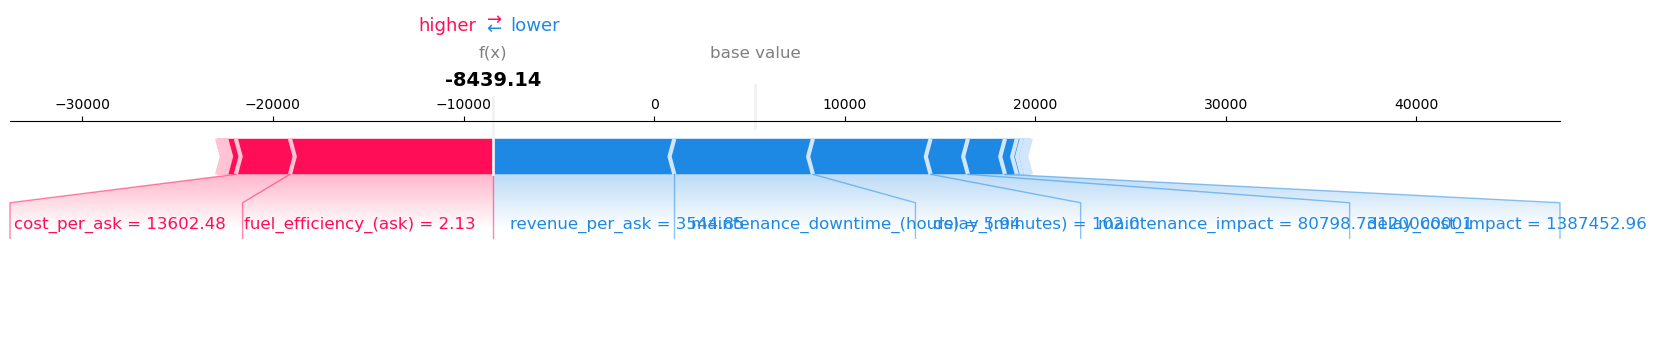


Final Model Interpretation Report
Best Model: Gradient Boosting
Key Predictive Features:
revenue_per_ask                 7454.476163
cost_per_ask                    6141.907169
maintenance_downtime_(hours)    5864.395782
fuel_efficiency_(ask)           5809.981462
delay_(minutes)                 4568.324709
maintenance_impact              3053.605251
delay_cost_impact               2649.099488
ancillary_revenue_(usd)          515.756264
ad_day_of_week                   485.347466
net_profit_margin_(%)            479.122448
dtype: float64


In [223]:
# Generate explanations using training data sample
X_sample = X_train.sample(100, random_state=42)
explainer, shap_values = explain_model(best_model, X_sample, feature_names=x.columns)

# Add model interpretation report
print("\nFinal Model Interpretation Report")
print(f"Best Model: {best_model_name}")
print(f"Key Predictive Features:")
feature_importance = pd.Series(np.abs(shap_values).mean(0), index=x.columns)
print(feature_importance.sort_values(ascending=False).head(10))

In [229]:
# Cross-validation for reliability assessment
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(
    pipeline,  # Your pipeline (e.g., RandomForestRegressor with PCA)
    X_train,   # Training features
    y_train,   # Training target
    cv=cv,     # Cross-validation strategy
    scoring='neg_root_mean_squared_error',  # Scoring metric
    n_jobs=-1  # Use all available CPU cores
)

# Convert scores to positive RMSE
cv_rmse_scores = -cv_scores

# Print cross-validation results
print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Mean CV RMSE: {cv_rmse_scores.mean():.2f} (±{cv_rmse_scores.std():.2f})")

Cross-Validation RMSE Scores: [3518.97156055 3498.52529256 3483.42591239 3526.76368619 3492.56794869]
Mean CV RMSE: 3504.05 (±16.29)
